In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# --- Directory Setup ---
base_dir = '/kaggle/input/pets-facial-expression-dataset/Master Folder'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir  = os.path.join(base_dir, 'test')

# --- Parameters ---
img_size = (224, 224)
batch_size = 16
num_classes = 4

# --- Data Generators ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

valid_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size,
    class_mode='categorical', shuffle=True
)

valid_generator = valid_test_datagen.flow_from_directory(
    valid_dir, target_size=img_size, batch_size=batch_size,
    class_mode='categorical', shuffle=False
)

test_generator = valid_test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size,
    class_mode='categorical', shuffle=False
)



2025-05-22 13:16:35.590206: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747919795.764465      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747919795.815305      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 1000 images belonging to 4 classes.
Found 36 images belonging to 4 classes.
Found 38 images belonging to 4 classes.


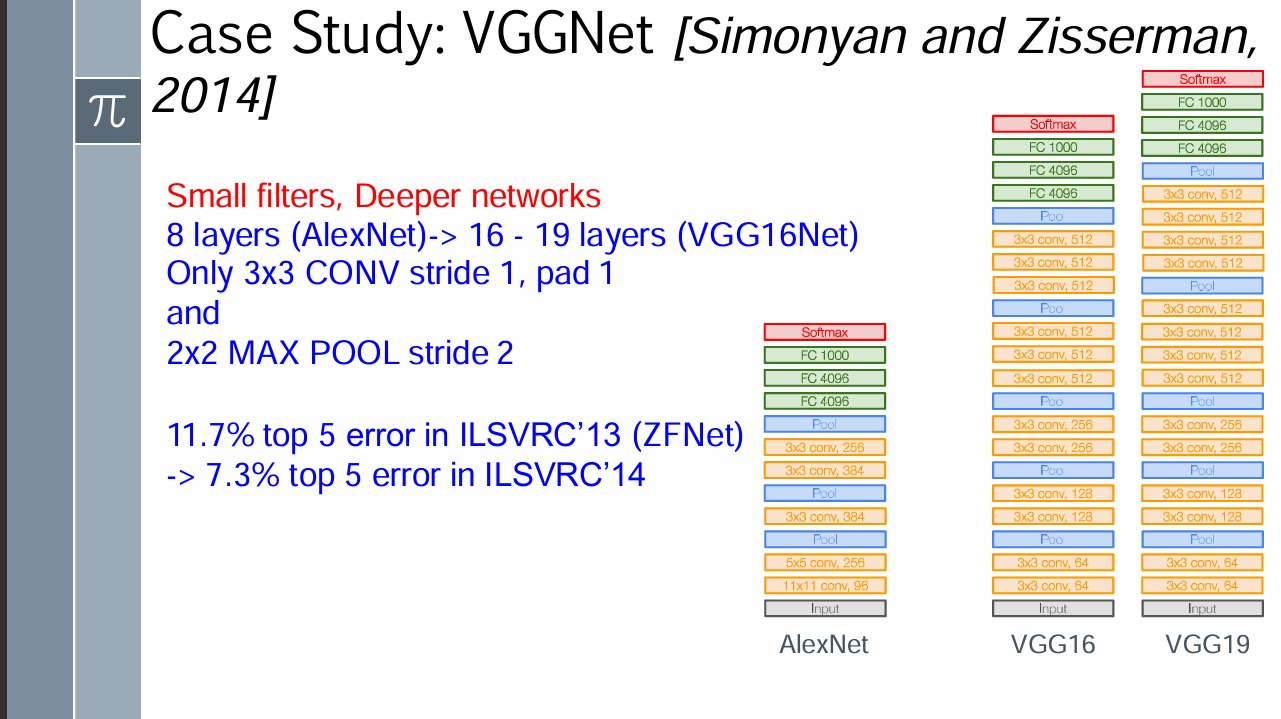

In [ ]:
# --- VGG19 Architecture 
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Fully Connected
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# --- Compile with SGD ---
model.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- EarlyStopping Callback ---
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# --- Train the Model ---
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=valid_generator,
    callbacks=[early_stop]
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1747919810.273594      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1747919821.584056      81 service.cc:148] XLA service 0x3e12d480 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747919821.584651      81 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1747919822.393106      81 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/63 ━━━━━━━━━━━━━━━━━━━━ 24:03 23s/step - accuracy: 0.3125 - loss: 1.7286

I0000 00:00:1747919835.817708      81 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


63/63 ━━━━━━━━━━━━━━━━━━━━ 58s 563ms/step - accuracy: 0.2882 - loss: 2.7316 - val_accuracy: 0.2222 - val_loss: 12.3325
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 213ms/step - accuracy: 0.3548 - loss: 1.5017 - val_accuracy: 0.2778 - val_loss: 3.3344
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 215ms/step - accuracy: 0.4244 - loss: 1.2589 - val_accuracy: 0.3056 - val_loss: 1.5115
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.5167 - loss: 1.1258 - val_accuracy: 0.3056 - val_loss: 1.6125
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 215ms/step - accuracy: 0.6142 - loss: 0.9776 - val_accuracy: 0.3611 - val_loss: 1.4555
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - accuracy: 0.6290 - loss: 0.8831 - val_accuracy: 0.3611 - val_loss: 1.6746
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.6528 - loss: 0.8499 - val_accuracy: 0.4444 - val_loss: 1.4709
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - accuracy: 0.7492 - loss: 0.6905 - val_accuracy: 0.30

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2673 - loss: 1.9686

Test Accuracy: 0.3158


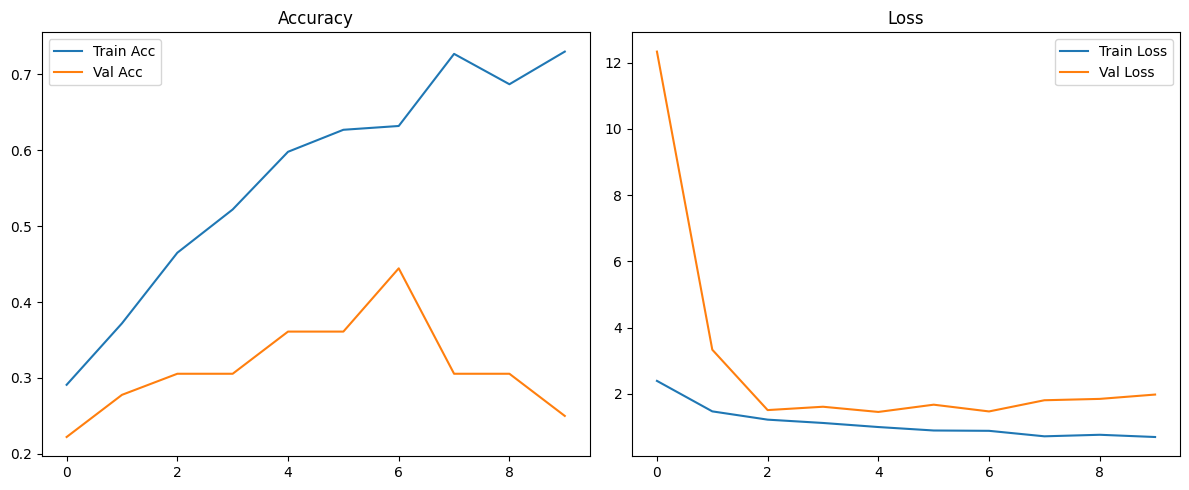

In [3]:
# --- Evaluate ---
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc:.4f}")

# --- Plot History ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()



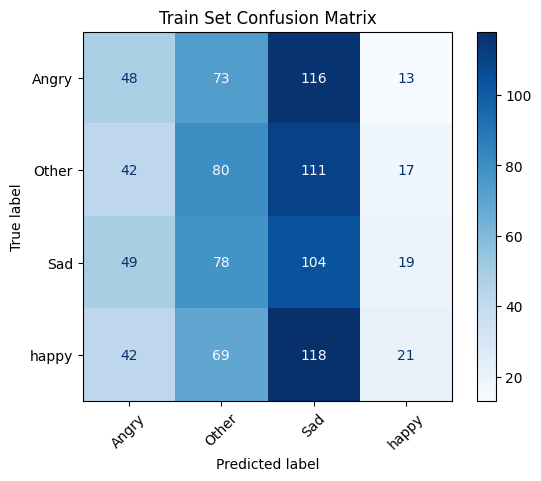

Classification Report - Train Set
              precision    recall  f1-score   support

       Angry     0.2652    0.1920    0.2227       250
       Other     0.2667    0.3200    0.2909       250
         Sad     0.2316    0.4160    0.2976       250
       happy     0.3000    0.0840    0.1313       250

    accuracy                         0.2530      1000
   macro avg     0.2659    0.2530    0.2356      1000
weighted avg     0.2659    0.2530    0.2356      1000



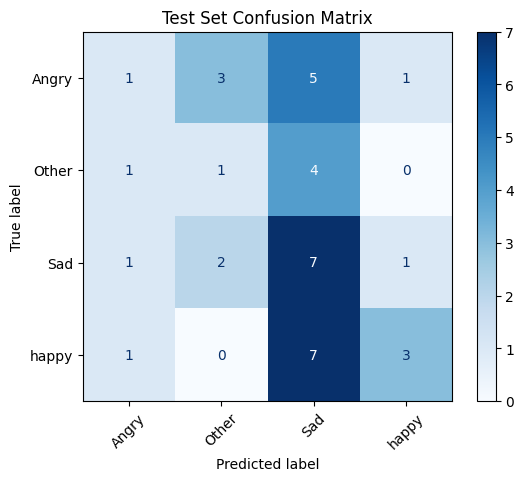

Classification Report - Test Set
              precision    recall  f1-score   support

       Angry     0.2500    0.1000    0.1429        10
       Other     0.1667    0.1667    0.1667         6
         Sad     0.3043    0.6364    0.4118        11
       happy     0.6000    0.2727    0.3750        11

    accuracy                         0.3158        38
   macro avg     0.3303    0.2939    0.2741        38
weighted avg     0.3539    0.3158    0.2917        38



In [4]:
# --- Confusion Matrix & Report ---
def evaluate_generator(gen, title):
    gen.reset()
    y_pred_probs = model.predict(gen, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = gen.classes
    class_names = list(gen.class_indices.keys())

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{title} Confusion Matrix")
    plt.xticks(rotation=45)
    plt.show()

    print(f"Classification Report - {title}")
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

evaluate_generator(train_generator, "Train Set")
evaluate_generator(test_generator, "Test Set")
